# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\wilbr\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv('NEWS_API')

In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
bitcoin_headlines = newsapi.get_everything(q='bitcoin',language="en")
bitcoin_headlines.keys()

dict_keys(['status', 'totalResults', 'articles'])

In [5]:
# Fetch the Ethereum news articles
ethereum_headlines = newsapi.get_everything(
    q='Ethereum',
    language='en'
)
ethereum_headlines.keys()

dict_keys(['status', 'totalResults', 'articles'])

In [6]:
print(f"The Total articles about Bitcoin: {bitcoin_headlines['totalResults']}")
print(f"The Total articles about Ethereum: {ethereum_headlines['totalResults']}")

The Total articles about Bitcoin: 8022
The Total articles about Ethereum: 2368


In [7]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []
for news in bitcoin_headlines['articles']:
    try:
        text = news['content']
        date = news['publishedAt']
        title= news['title']
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment['compound']
        positive = sentiment['pos']
        neutral = sentiment['neu']
        negative = sentiment['neg']
        bitcoin_sentiments.append({
            'Title': title,
            'Text': text,
            'Date': date,
            'Compound': compound,
            'Positive': positive,
            'Neutral': neutral,
            'Negative':negative
        })
    except AttributeError:
        pass
bitcoin_df = pd.DataFrame(bitcoin_sentiments)
columns = ['Date','Title','Text','Compound','Positive','Neutral','Neutral','Negative']
bitcoin_df = bitcoin_df[columns]
bitcoin_df.head()
        


,Date,Title,Text,Compound,Positive,Neutral,Neutral,Negative
0,2021-07-19T11:00:00Z,Why Not Use Self-Driving Cars as Supercomputers?,"Like Dogecoin devotees, the mayor of Reno, and...",0.6908,0.178,0.822,0.822,0.000
1,2021-07-05T19:45:10Z,Kaseya ransomware attackers demand $70 million...,Filed under:\r\nThe supply chain attack has re...,-0.5719,0.111,0.705,0.705,0.184
2,2021-07-05T12:14:34Z,Gang behind huge cyber-attack demands $70m in ...,image copyrightGetty Images\r\nThe gang behind...,-0.6124,0.000,0.857,0.857,0.143
3,2021-07-14T19:09:01Z,Crypto startup Phantom banks funding from Andr...,While retail investors grew more comfortable b...,0.7264,0.164,0.836,0.836,0.000
4,2021-07-21T22:00:14Z,Michael Arrington’s next act,"As longtime TechCrunch readers know well, Mich...",0.4939,0.127,0.873,0.873,0.000


In [8]:
# Create the Ethereum sentiment scores DataFrame
ethereum_sentiments = []
for news in ethereum_headlines['articles']:
    try:
        text = news['content']
        date = news['publishedAt']
        title= news['title']
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment['compound']
        positive = sentiment['pos']
        neutral = sentiment['neu']
        negative = sentiment['neg']
        ethereum_sentiments.append({
            'Title': title,
            'Text': text,
            'Date': date,
            'Compound': compound,
            'Positive': positive,
            'Neutral': neutral,
            'Negative':negative
        })
    except AttributeError:
        pass
ethereum_df = pd.DataFrame(ethereum_sentiments)
columns = ['Date','Title','Text','Compound','Positive','Neutral','Neutral','Negative']
ethereum_df = ethereum_df[columns]
ethereum_df.head()

,Date,Title,Text,Compound,Positive,Neutral,Neutral,Negative
0,2021-07-16T16:00:55Z,"Crypto investors like Terraform Labs so much, ...",There are many blockchain platforms competing ...,0.3612,0.075,0.925,0.925,0.000
1,2021-07-14T19:09:01Z,Crypto startup Phantom banks funding from Andr...,While retail investors grew more comfortable b...,0.7264,0.164,0.836,0.836,0.000
2,2021-07-02T15:49:56Z,Ethereum now has more active addresses than bi...,Bitcoin and Ethereum\r\nYuriko Nakao\r\nEther ...,0.3612,0.110,0.849,0.849,0.041
3,2021-07-17T14:34:00Z,Ethereum Co-Founder Says Safety Concern Has Hi...,"""Anthony Di Iorio, a co-founder of the Ethereu...",0.6369,0.157,0.843,0.843,0.000
4,2021-07-05T12:54:02Z,More than $13 billion worth of ether has been ...,"Ether holders have ""staked"" more than $13 bill...",0.7717,0.194,0.806,0.806,0.000


In [9]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,Compound,Positive,Neutral,Neutral,Negative
count,20.000000,20.000000,20.00000,20.00000,20.000000
mean,-0.001585,0.043850,0.91785,0.91785,0.038250
std,0.366882,0.064203,0.08801,0.08801,0.055168
min,-0.612400,0.000000,0.70500,0.70500,0.000000
25%,-0.095450,0.000000,0.84025,0.84025,0.000000
50%,0.000000,0.000000,0.92000,0.92000,0.000000
75%,0.108475,0.105750,1.00000,1.00000,0.076250
max,0.726400,0.178000,1.00000,1.00000,0.184000


In [10]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,Compound,Positive,Neutral,Neutral,Negative
count,20.000000,20.000000,20.000000,20.000000,20.000000
mean,0.255185,0.074900,0.908250,0.908250,0.016850
std,0.342762,0.071082,0.075962,0.075962,0.030824
min,-0.381800,0.000000,0.782000,0.782000,0.000000
25%,0.000000,0.000000,0.842750,0.842750,0.000000
50%,0.305600,0.077500,0.920000,0.920000,0.000000
75%,0.528675,0.149250,1.000000,1.000000,0.010250
max,0.771700,0.194000,1.000000,1.000000,0.080000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum has the highest mean positive score

Q: Which coin had the highest compound score?

A: Ethereum has the highest compound score

Q. Which coin had the highest positive score?

A: Ethereum had the highest positive score

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [11]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [15]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
stopwords = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
addon = {'.'}
sw = stopwords.union(addon)

In [16]:
# Complete the tokenizer function
def tokenizer(text):
    
    # Remove the punctuation from text
    regex = re.compile('[^a-zA-Z ]')
    re_clean = regex.sub('', text)
   
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase
    tokens = [x.lower() for x in words if x.lower() not in sw.union(addon)]
    
    # Remove the stop words
    
    
    return tokens

In [17]:
# Create a new tokens column for Bitcoin
bitcoin_token = []
for text in bitcoin_df['Text']:
    tokens = tokenizer(text)
    bitcoin_token.append(tokens)
bitcoin_df['tokens'] = bitcoin_token
bitcoin_df.head()

,Date,Title,Text,Compound,Positive,Neutral,Neutral,Negative,tokens
0,2021-07-19T11:00:00Z,Why Not Use Self-Driving Cars as Supercomputers?,"Like Dogecoin devotees, the mayor of Reno, and...",0.6908,0.178,0.822,0.822,0.000,"[like, dogecoin, devotees, mayor, reno, leader..."
1,2021-07-05T19:45:10Z,Kaseya ransomware attackers demand $70 million...,Filed under:\r\nThe supply chain attack has re...,-0.5719,0.111,0.705,0.705,0.184,"[filed, underthe, supply, chain, attack, reach..."
2,2021-07-05T12:14:34Z,Gang behind huge cyber-attack demands $70m in ...,image copyrightGetty Images\r\nThe gang behind...,-0.6124,0.000,0.857,0.857,0.143,"[image, copyrightgetty, imagesthe, gang, behin..."
3,2021-07-14T19:09:01Z,Crypto startup Phantom banks funding from Andr...,While retail investors grew more comfortable b...,0.7264,0.164,0.836,0.836,0.000,"[retail, investors, grew, comfortable, buying,..."
4,2021-07-21T22:00:14Z,Michael Arrington’s next act,"As longtime TechCrunch readers know well, Mich...",0.4939,0.127,0.873,0.873,0.000,"[longtime, techcrunch, readers, know, well, mi..."


In [18]:
# Create a new tokens column for Ethereum
ethereum_token = []
for text in ethereum_df['Text']:
    tokens = tokenizer(text)
    ethereum_token.append(tokens)
ethereum_df['tokens'] = ethereum_token
ethereum_df.head()

,Date,Title,Text,Compound,Positive,Neutral,Neutral,Negative,tokens
0,2021-07-16T16:00:55Z,"Crypto investors like Terraform Labs so much, ...",There are many blockchain platforms competing ...,0.3612,0.075,0.925,0.925,0.000,"[many, blockchain, platforms, competing, inves..."
1,2021-07-14T19:09:01Z,Crypto startup Phantom banks funding from Andr...,While retail investors grew more comfortable b...,0.7264,0.164,0.836,0.836,0.000,"[retail, investors, grew, comfortable, buying,..."
2,2021-07-02T15:49:56Z,Ethereum now has more active addresses than bi...,Bitcoin and Ethereum\r\nYuriko Nakao\r\nEther ...,0.3612,0.110,0.849,0.849,0.041,"[bitcoin, ethereumyuriko, nakaoether, overtook..."
3,2021-07-17T14:34:00Z,Ethereum Co-Founder Says Safety Concern Has Hi...,"""Anthony Di Iorio, a co-founder of the Ethereu...",0.6369,0.157,0.843,0.843,0.000,"[anthony, di, iorio, cofounder, ethereum, netw..."
4,2021-07-05T12:54:02Z,More than $13 billion worth of ether has been ...,"Ether holders have ""staked"" more than $13 bill...",0.7717,0.194,0.806,0.806,0.000,"[ether, holders, staked, billion, worth, crypt..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [21]:
from collections import Counter
from nltk import ngrams

In [22]:
# Generate the Bitcoin N-grams where N=2
bitcoin_ngram_count = []
for tokens in bitcoin_df['tokens']:
    ngrams_count = dict(Counter(ngrams(tokens, n=2)))
    bitcoin_ngram_count.append(ngrams_count.items())
bitcoin_ngram_count

[dict_items([(('like', 'dogecoin'), 1), (('dogecoin', 'devotees'), 1), (('devotees', 'mayor'), 1), (('mayor', 'reno'), 1), (('reno', 'leaders'), 1), (('leaders', 'el'), 1), (('el', 'salvador'), 1), (('salvador', 'aldo'), 1), (('aldo', 'baoicchi'), 1), (('baoicchi', 'convinced'), 1), (('convinced', 'cryptocurrency'), 1), (('cryptocurrency', 'future'), 1), (('future', 'ceo'), 1), (('ceo', 'founder'), 1), (('founder', 'canadian'), 1), (('canadian', 'scooter'), 1), (('scooter', 'maker'), 1), (('maker', 'daymak'), 1), (('daymak', 'believes'), 1), (('believes', 'chars'), 1)]),
 dict_items([(('filed', 'underthe'), 1), (('underthe', 'supply'), 1), (('supply', 'chain'), 1), (('chain', 'attack'), 1), (('attack', 'reached'), 1), (('reached', 'thousand'), 1), (('thousand', 'organizationsillustration'), 1), (('organizationsillustration', 'alex'), 1), (('alex', 'castro'), 1), (('castro', 'vergethree'), 1), (('vergethree', 'days'), 1), (('days', 'ransomware'), 1), (('ransomware', 'attackers'), 1), ((

In [23]:
# Generate the Ethereum N-grams where N=2
ethereum_ngram_count = []
for tokens in ethereum_df['tokens']:
    ngrams_count = dict(Counter(ngrams(tokens, n=2)))
    ethereum_ngram_count.append(ngrams_count.items())
ethereum_ngram_count

[dict_items([(('many', 'blockchain'), 1), (('blockchain', 'platforms'), 1), (('platforms', 'competing'), 1), (('competing', 'investors'), 1), (('investors', 'developers'), 1), (('developers', 'attention'), 1), (('attention', 'right'), 1), (('right', 'big'), 1), (('big', 'daddy'), 1), (('daddy', 'ethereum'), 1), (('ethereum', 'socalled'), 1), (('socalled', 'ethereum'), 1), (('ethereum', 'killers'), 1), (('killers', 'like'), 1), (('like', 'solana'), 1), (('solana', 'wrote'), 1), (('wrote', 'chars'), 1)]),
 dict_items([(('retail', 'investors'), 1), (('investors', 'grew'), 1), (('grew', 'comfortable'), 1), (('comfortable', 'buying'), 1), (('buying', 'cryptocurrencies'), 1), (('cryptocurrencies', 'like'), 1), (('like', 'bitcoin'), 1), (('bitcoin', 'ethereum'), 1), (('ethereum', 'decentralized'), 1), (('decentralized', 'application'), 1), (('application', 'world'), 1), (('world', 'still'), 1), (('still', 'lot'), 1), (('lot', 'work'), 1), (('work', 'comes'), 1), (('comes', 'onboarding'), 1), 

In [24]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [26]:
# Use token_count to get the top 10 words for Bitcoin
bitcoin_wordmap ={}
for bitcoin_token in bitcoin_df['tokens']:
    top = dict(token_count(bitcoin_token, 10))
    for key in top:
        if(key in bitcoin_wordmap):
            bitcoin_wordmap[key] += top[key]
        else:
            bitcoin_wordmap[key] = top[key]
bitcoin_word_list = list(bitcoin_wordmap.items())
x = sorted(bitcoin_word_list, key=lambda x:x[1], reverse=True)
bitcoin_top10 = []

for i in range(0,10):
    bitcoin_top10.append(x[i])
bitcoin_top10

[('bitcoin', 19),
 ('reuters', 10),
 ('seen', 7),
 ('virtual', 6),
 ('illustration', 6),
 ('representation', 5),
 ('currency', 5),
 ('front', 5),
 ('stock', 5),
 ('taken', 5)]

In [27]:
# Use token_count to get the top 10 words for Ethereum
ethereum_wordmap ={}
for ethereum_token in ethereum_df['tokens']:
    top = dict(token_count(ethereum_token, 10))
    for key in top:
        if(key in ethereum_wordmap):
            ethereum_wordmap[key] += top[key]
        else:
            ethereum_wordmap[key] = top[key]
ethereum_word_list = list(ethereum_wordmap.items())
x = sorted(ethereum_word_list, key=lambda x:x[1], reverse=True)
ethereum_top10 = []

for i in range(0,10):
    ethereum_top10.append(x[i])
ethereum_top10

[('bitcoin', 11),
 ('ethereum', 9),
 ('cryptocurrency', 6),
 ('network', 5),
 ('reuters', 5),
 ('seen', 4),
 ('investors', 3),
 ('friday', 3),
 ('billion', 3),
 ('recent', 3)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [28]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

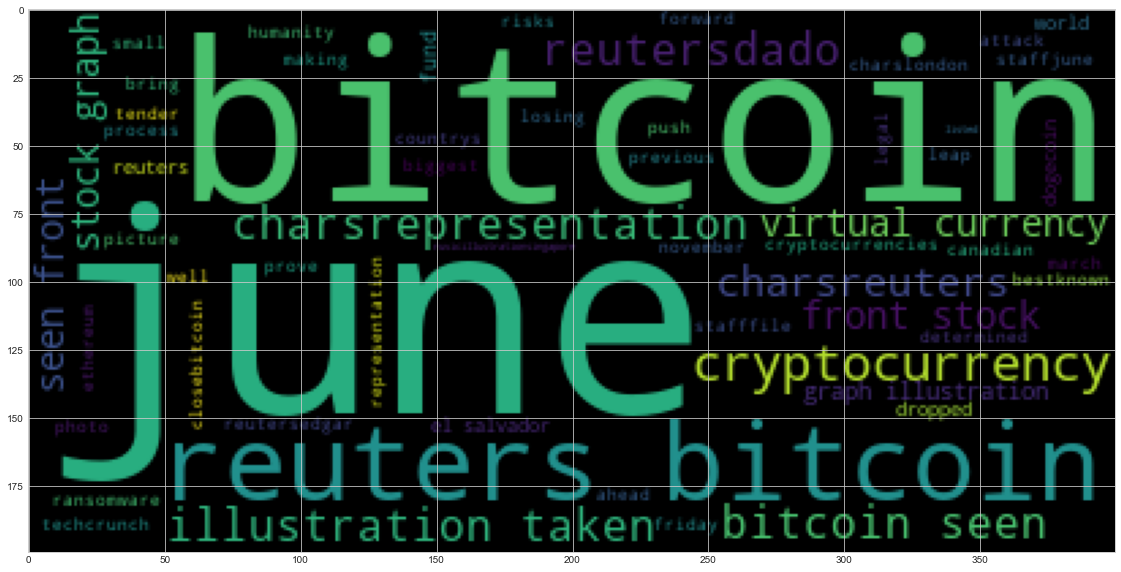

In [30]:
# Generate the Bitcoin word cloud
text_ = []
for bitcoin_token in bitcoin_df['tokens']:
    text_.append(' '.join(bitcoin_token))
text = ''
for i in text_:
    text += i
wc = WordCloud().generate(text)
plt.imshow(wc)

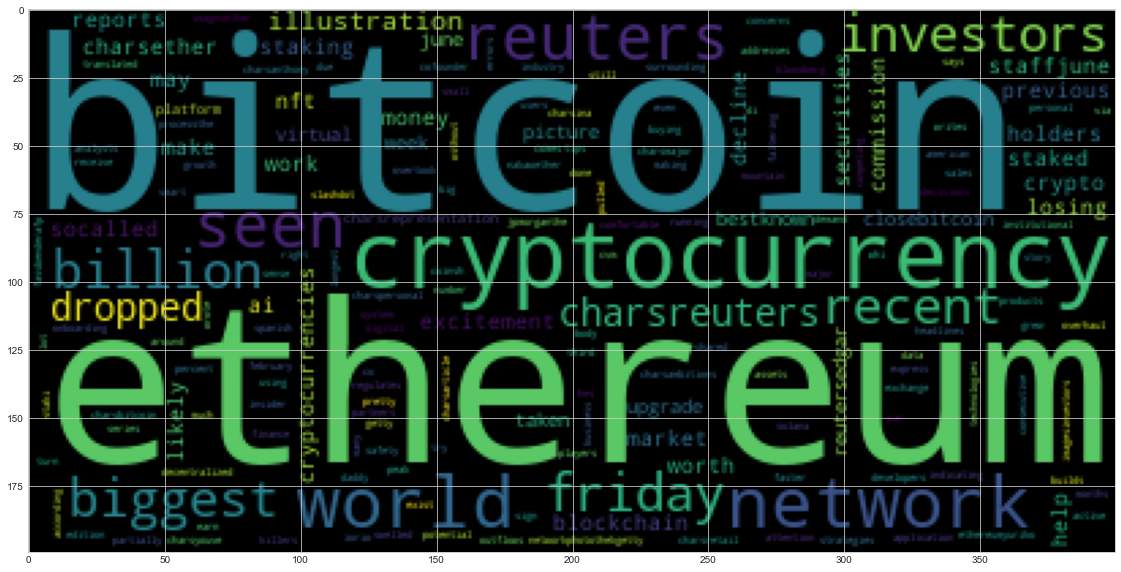

In [31]:
# Generate the Ethereum word cloud
text_eth = []
for ethereum_token in ethereum_df['tokens']:
    text_eth.append(' '.join(ethereum_token))
text = ''
for i in text_eth:
    text += i
wc = WordCloud().generate(text)
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [32]:
import spacy
from spacy import displacy

In [33]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [34]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [36]:
# Concatenate all of the Bitcoin text together
text_btc = ''
for text in bitcoin_df['Text']:
    text_btc += text
text_btc

'Like Dogecoin devotees, the mayor of Reno, and the leaders of El Salvador, Aldo Baoicchi is convinced cryptocurrency is the future. The CEO and founder of Canadian scooter maker Daymak believes this … [+4116 chars]Filed under:\r\nThe supply chain attack has reached over a thousand organizations.\r\nIllustration by Alex Castro / The Verge\r\nThree days after ransomware attackers started the holiday weekend by comprom… [+3376 chars]image copyrightGetty Images\r\nThe gang behind a "colossal" ransomware attack has demanded $70m (£50.5m) paid in Bitcoin in return for a "universal decryptor" that it says will unlock the files of all … [+4140 chars]While retail investors grew more comfortable buying cryptocurrencies like Bitcoin and Ethereum in 2021, the decentralized application world still has a lot of work to do when it comes to onboarding a… [+2288 chars]As longtime TechCrunch readers know well, Michael Arrington cofounded TechCrunch and Crunchbase, as well as the venture fund CrunchFund

In [39]:
# Run the NER processor on all of the text
doc = nlp(text_btc)

# Add a title to the document
doc.user_data['Title'] = ' Bitcoin text analysis'

In [40]:
# Render the visualization
displacy.render(doc, style='ent')

In [41]:
# List all Entities
doc.ents

(Dogecoin,
 Reno,
 El Salvador,
 Aldo Baoicchi,
 Canadian,
 Daymak,
 Alex Castro,
 Verge,
 Three days,
 the holiday weekend,
 $70m,
 £50.5m,
 Bitcoin,
 Bitcoin and Ethereum,
 2021,
 TechCrunch,
 Michael Arrington,
 Crunchbase,
 CrunchFund,
 Tuesday,
 2017,
 June 23,
 Reuters,
 El Salvador,
 June 23,
 Reuters,
 El Salvador,
 Pr,
 earlier this year,
 Dogecoin,
 Bitcoin,
 March 15, 2021,
 Dado Ruvic,
 June 30,
 Reuters,
 Bitcoin,
 June 14, 2021,
 Edgar Su,
 Reuters,
 7.37%,
 32,094.44,
 Reuters,
 Bitcoin,
 June 7, 2021,
 Edgar Su/Illustration/File Photo,
 Reuters,
 Martin/CNET,
 UK,
 Spain,
 Twitter,
 2020,
 the US Department of Justi,
 Reuters,
 June 25,
 Reuters,
 7.37%,
 32,094.44,
 Friday,
 2,554.88,
 Bitcoin,
 50.5,
 Bitcoin,
 May 19, 2021,
 Dado Ruvic,
 Reuters,
 5.17%,
 33,
 Reuters,
 June 25,
 Reuters,
 8.51%,
 31,699.83,
 22:04,
 GMT,
 Friday,
 2,937.27,
 Bitcoin,
 Reuters,
 November 19, 2020,
 November 19, 2020,
 Dado Ruvic/IllustrationSINGAPORE,
 July 21,
 Reuters,
 Bitcoin, Et

---

### Ethereum NER

In [42]:
# Concatenate all of the Ethereum text together
text_ethereum = ''
for text in ethereum_df['Text']:
    text_ethereum += text
text_ethereum

'There are many blockchain platforms competing for investors’ and developers’ attention right now, from the big daddy of them all, Ethereum, to so-called “Ethereum Killers” like Solana, which we wrote… [+2563 chars]While retail investors grew more comfortable buying cryptocurrencies like Bitcoin and Ethereum in 2021, the decentralized application world still has a lot of work to do when it comes to onboarding a… [+2288 chars]Bitcoin and Ethereum\r\nYuriko Nakao\r\nEther overtook bitcoin in the number of active addresses on its network on Friday, a sign that demand is faltering for the world\'s biggest cryptocurrency as its co… [+2727 chars]"Anthony Di Iorio, a co-founder of the Ethereum network, says he\'s done with the cryptocurrency world, partially because of personal safety concerns," reports Bloomberg, in a story shared by Slashdot… [+1550 chars]Ether holders have "staked" more than $13 billion worth of the cryptocurrency on the ethereum 2.0 network, as excitement builds around th

In [43]:
# Run the NER processor on all of the text
doc = nlp(text_ethereum)

# Add a title to the document
doc.user_data['Title'] = ' Ethereum text analysis'

In [44]:
# Render the visualization
displacy.render(doc, style='ent')

In [45]:
# List all Entities
doc.ents

(Ethereum,
 Ethereum Killers,
 Solana,
 Bitcoin and Ethereum,
 2021,
 Ethereum,
 Yuriko Nakao,
 Friday,
 Di Iorio,
 Ethereum,
 Bloomberg,
 Slashdot,
 more than $13 billion,
 2.0,
 Photothek/Getty Images,
 more than $13 billion,
 2.0,
 $40 billion,
 2025,
 JPMorgan,
 NFT,
 as much as,
 90 percent,
 recent weeks,
 recent months,
 American Express,
 Spanish,
 AI,
 The Securities and Exchange Commission,
 Reuters,
 June 25,
 Reuters,
 7.37%,
 32,094.44,
 Friday,
 2,554.88,
 Bitcoin,
 50.5,
 Getty Images
 Investors,
 the third week,
 February 2018,
 London,
 Ethereum,
 12 965,
 between August 3-5, 2021,
 Clie,
 Reuters,
 Bitcoin,
 June 7, 2021,
 Edgar Su/Illustration/File Photo,
 Reuters,
 Reuters,
 June 25,
 Reuters,
 8.51%,
 31,699.83,
 22:04,
 GMT,
 Friday,
 2,937.27,
 Bitcoin,
 Hackaday,
 Proof of Work,
 PoW,
 Bitcoin, Ethereum,
 Dogecoin,
 Bitcoin,
 May 19, 2021,
 Dado Ruvic,
 Reuters,
 5.17%,
 33,
 Bitcoin,
 June 14, 2021,
 Edgar Su,
 Reuters,
 7.37%,
 32,094.44,
 Polygon,
 $100 milli

---